# Цифровая обработка сигналов - Лекция 15

# Тема: Вейвлет-преобразования

Как было замечено в предыдущих лекциях, у оконного преобразования Фурье есть одно ограничение: разрешение по времени/частоте у него остается фиксированным и зависит от ширины окна. Но что если мы хотим получить разное разрешение для разных частотных полос? Для такой задачи понадобится вейвлет-преобразование.

**Вейвлет-преобразование** — интегральное преобразование, представляющее собой свертку вейвлет-функции с сигналом. Вейвлет-преобразование похоже на оконное преобразование Фурье, так как переводит сигнал из временного представления в частотно-временное.

**Wavelet** дословно переводится как "*короткая (маленькая) волна*". Вейвлет это волнообразная функция с быстро затухающей амплитудой и нулевым средним. 

Вейвлеты преобразует функцию в двумерную поверхность:

$$ y(t) \to T(t, f) \tag{15.1}$$

где $T(t, f)$ - вклад частоты $f$ в момент времени $t$ в сигнале.

Чтобы произвольная функция $\Phi(t)$ могла считаться вейвлет-функцией, она должна удовлетворять двум условиям:
1. **Иметь нулевое среднее:** 
$$\int\limits_{-\infty}^\infty \Phi(t)\mathrm{dt} = 0 \tag{15.2}$$

то есть не иметь компоненты нулевой частоты.

2. **Иметь ограниченную энергию:**
$$\int\limits_{-\infty}^\infty |\Phi(t)|^2\mathrm{dt} < \infty  \tag{15.3}$$

то есть быть локализованной во времени, *не бесконечной*.

Рассмотрим и визуализируем несколько популярных вейвлет-функций.
- **Гауссов вейвлет:**
$$\Phi_{a}(t) = (\frac{2}{\pi a^2})^{\frac{1}{4}}e(-\frac{t^2}{a^2} -jt) \text{,  где  } a = \frac{\omega}{\sigma}  \tag{15.4}$$

- **Вейвлет Хаара:**
$$
\Phi(t)
= 
\begin{cases}
1, \text{ if } t \in [0; \frac{1}{2})\\
-1, \text{ if } t \in [\frac{1}{2}; 1)\\
0, \text{ if } t \notin [0; 1)
\end{cases}
\tag{15.5}$$

- **Мексиканская шляпа:**
$$\Phi(t) = \frac{2}{\sqrt{3\sigma}\pi^\frac{1}{4}}\left[1 - (\frac{t}{\sigma})^2\right]e^{-\frac{t^2}{2\sigma^2}} \tag{15.6}$$

- **Морлет:** 
$$\Phi(t) = ke^{j\omega_{0}t} e^{-\frac{t^2}{2}} \tag{15.7}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

В python есть библиотека **pyWavelets**, позволяющая легко вычислять вейвлет-преобразования. Библиотека содержит реализации множества вейвлет-функций из различных семейств, как дискретных, так и непрерывных.

In [2]:
import pywt

# All wavelet families available in pywt
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

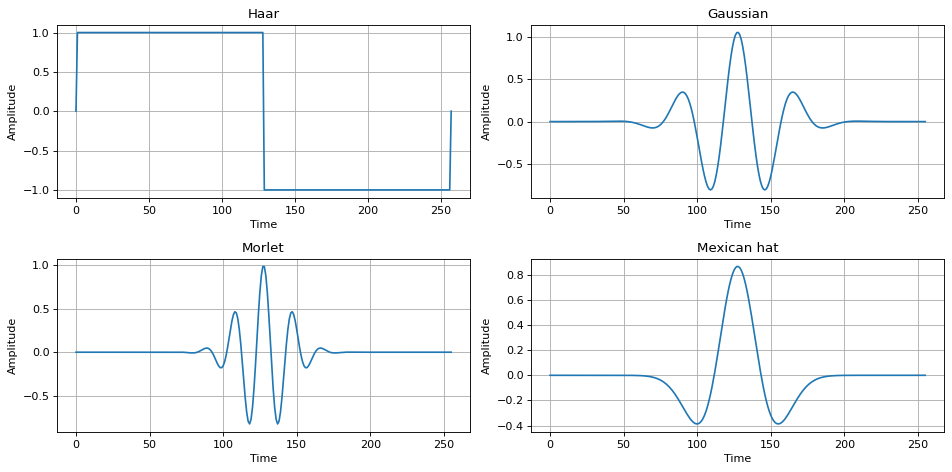

In [3]:
# Haar wavelet
_, haar, _ = pywt.Wavelet('haar').wavefun()

# Gaussian wavelet
gauss, _ = pywt.ContinuousWavelet('gaus8').wavefun()

# Morlet wavelet
morlet, _ = pywt.ContinuousWavelet('morl').wavefun()

# Mexican hat
mex_hat, _ = pywt.ContinuousWavelet('mexh').wavefun()

# Plot wavelet functions
wavelets = [haar, gauss, morlet, mex_hat]
titles = ['Haar', 'Gaussian', 'Morlet', 'Mexican hat']

fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(wavelets):
    plt.subplot(2, 2, i+1)
    plt.ylabel('Amplitude')
    plt.title(titles[i])
    plt.plot(sig)
    plt.xlabel('Time')
    plt.grid()
plt.tight_layout()

Так как морлет является комплексной функцией и имеет как вещественную, так и мнимую часть, для примера рассмотрим его в 3D (иозбражение интерактивное).

<IPython.core.display.Javascript object>


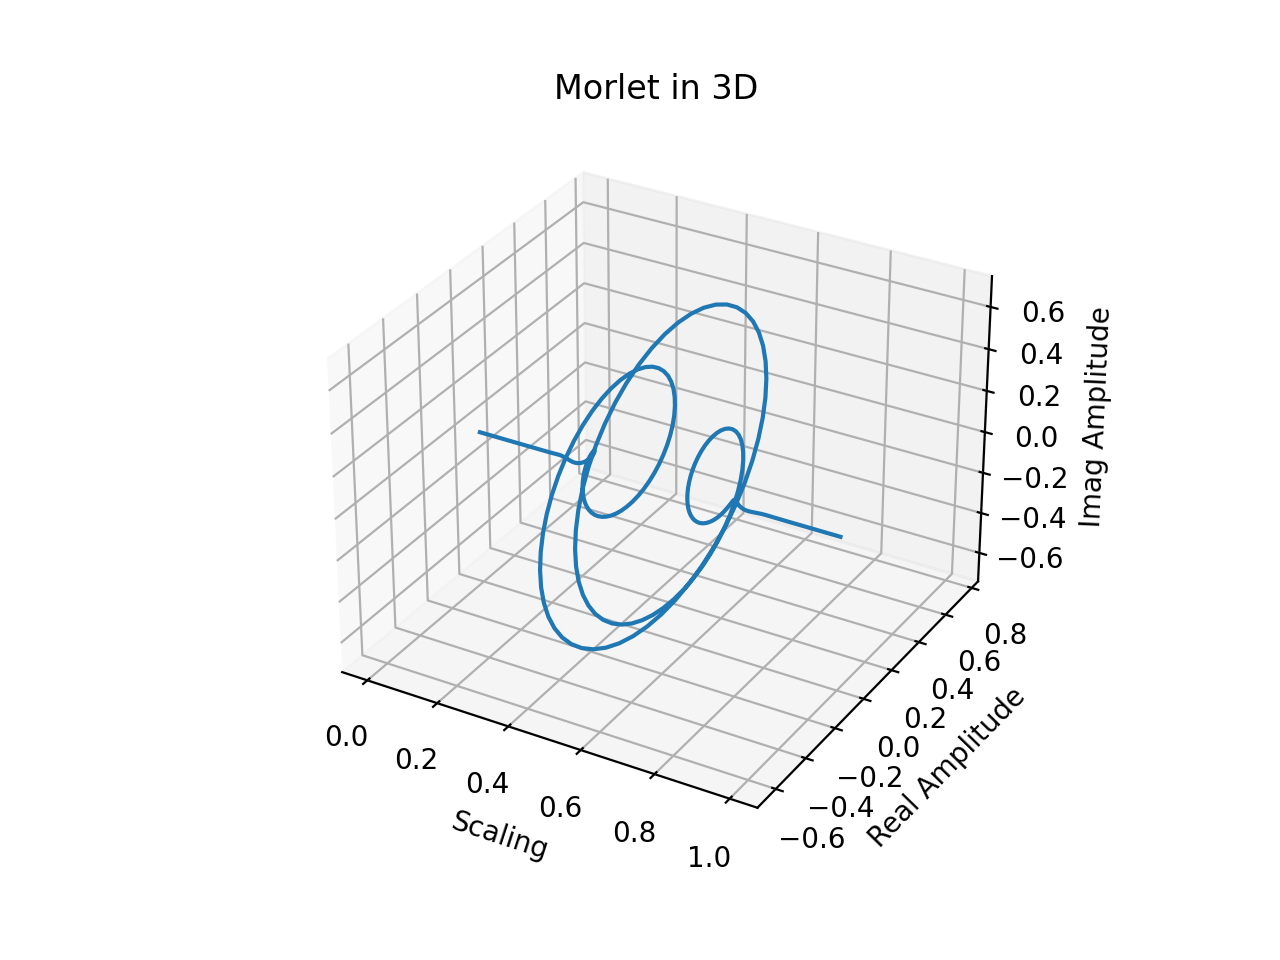

In [4]:
%matplotlib notebook
from scipy import signal

fs = 500
n_cycles = 5
freq = 5
scaling = 1.0
wavelet_len = int(n_cycles * fs / freq)
morlet = signal.morlet(wavelet_len, n_cycles, scaling)


# Plot real and imaginary parts in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.linspace(0, scaling, morlet.size), morlet.real, morlet.imag)
plt.title('Morlet in 3D')
ax.set(xlabel='Scaling', ylabel='Real Amplitude', zlabel='Imag Amplitude')
plt.show()

Вейвлеты, используемые в вейвлет-преобразовании, получаются с помощью сдвига и масштабирования базовой вейвлет-функции (**материнского вейвлета**) наподобие рассмотренных выше.

- **Масштабирование вейвлета:**

$$\Phi_{a}(t) = \Phi(\frac{t}{a}) \tag{15.8}$$

$a$ - коэффициент масштабирования.

Как видно из формулы, шкала вейвлета обратно пропорционально его частоте. Растянутые вейвлеты (с низкой частотой) помогают улавливать медленные изменения в сигнале; сжатые вейвлеты (с высокой частотй), наоборот - быстрые изменения.
Ниже показан один вейвлет с разным масштабом (частотой).

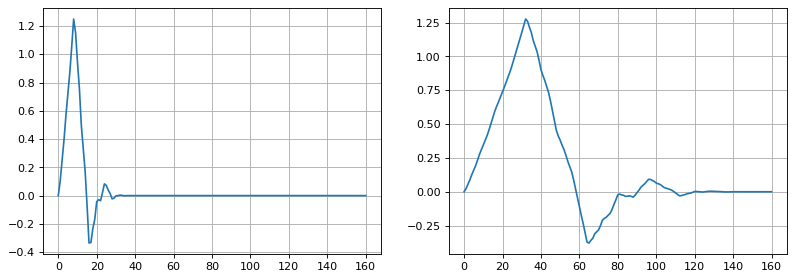

In [5]:
%matplotlib inline

w = pywt.Wavelet('sym3')
(phi, psi, x) = w.wavefun(level=3)
(phi2, psi2, x2) = w.wavefun(level=5)
phi = np.append(phi, np.zeros(120))
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 4), dpi=80)
ax1.plot(phi)
ax1.grid()
ax2.plot(phi2)
ax2.grid()

Видно, что с уменьшением частоты вейвлет становится более растянутым по времени, и наоборот.

- **Сдвиг вейвлета:**

$$\Phi_{b}(t) = \Phi(t - b) \tag{15.9}$$

С изменением параметра сдвига $b$ базовый вейвлет сдвигается по оси $X$, позволяя захватить сигнал на всей его протяженности. Ниже приведена иллюстрация сдвига вейвлета вдоль сигнала.

<IPython.core.display.Javascript object>


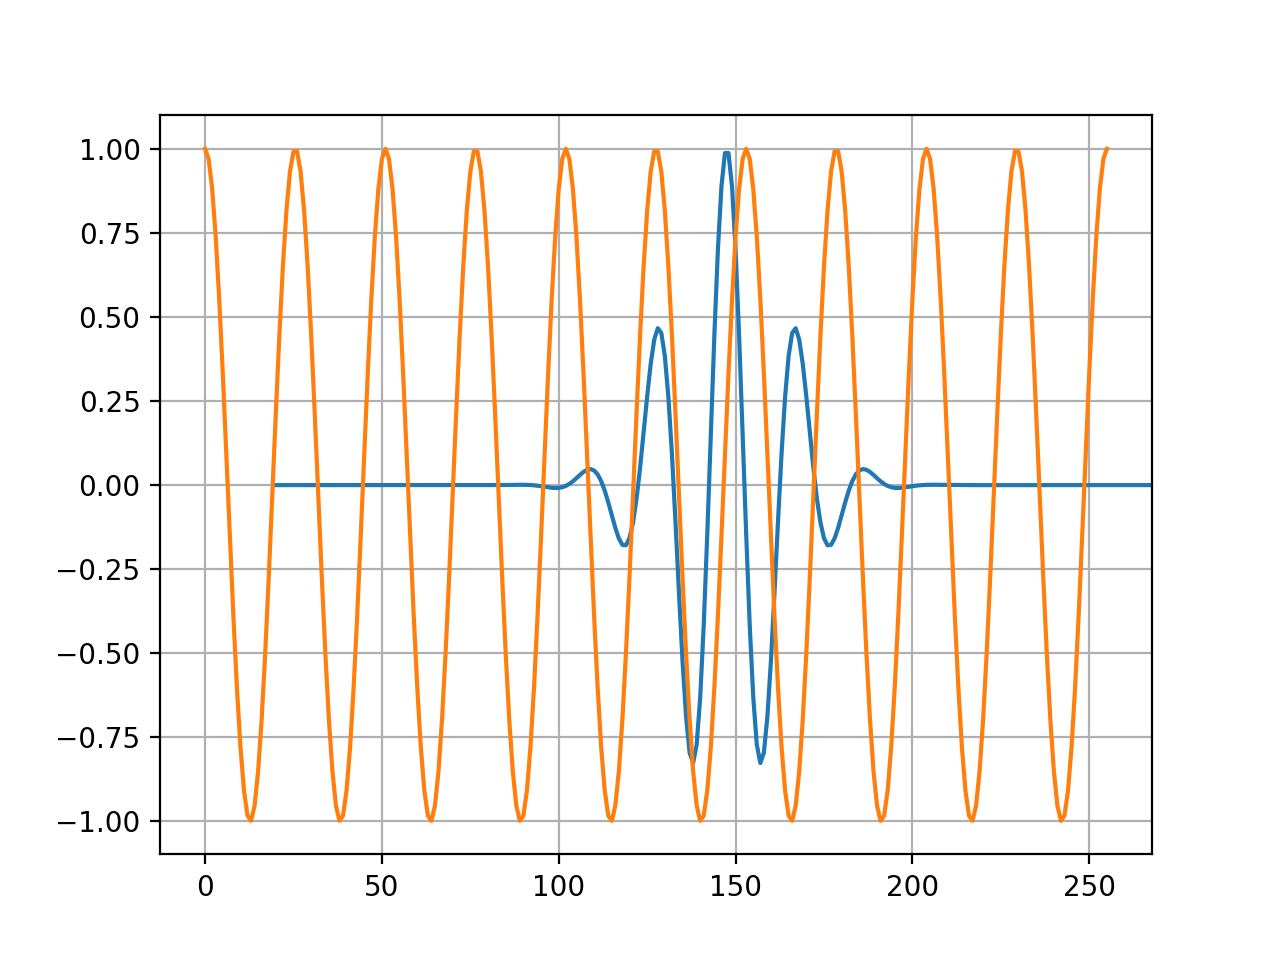

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [6]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

ns = 1024
time = np.arange(ns)
morlet, smh = pywt.ContinuousWavelet('morl').wavefun()

x = np.linspace(0, 5 * np.pi, 256)
fig = plt.figure()
plt.grid()
line, = plt.plot(morlet)
line2, = plt.plot(np.cos(4 * x))


def update(w = 1.0):
    line.set_xdata(range(round(20 * w), round(20 * w) + len(morlet)))
    fig.canvas.draw_idle()

interact(update);

Таким образом, вейвлеты, получаемые преобразование материнского вейвлета, выглядт следующим образом:
$$\Phi_{a, b}(t) = \Phi(\frac{t - b}{a}) \tag{15.10}$$
Меняя параметры сдвига и масштаба, мы можем проанализировать, какие частоты присутствуют в сигнале в определенный момент времени.

## Непрерывное и дискретное вейвлет-преобразование

Вейвлет-преобразование задается как свертка сигнала и материнского вейвлета $\Phi_{a, b}$ с различными параметрами мастштаба $a$ и сдвига $b$. По сути мы в каждый момент времени $t$ оценивает кросс-корреляцию сигнала и вейвлета определенной частоты; полученное значение будет максимальным по модулю там, где частоты вейвлета и сигнала совпадают.

Есть два вида вейвлет-преобразований: непрерывное и дискретное. Они различаютcя тем, что для непрерывного преобразования масштаб $a$ и сдвиг $b$ являются непрерывными, следовательно, есть бесконечное количество вейвлетов с разным масштабом и сдвигом. 
Дискретное преобразование, наоборот, использует конечное множество вейвлетов, полученных из конечного множества значений сдвига и масштаба.

- **Непрерывное вейвлет-преобразование**

$$T(a, b) = \frac{1}{\sqrt{a}}\int\limits_{-\infty}^\infty y(t)\hat{\Phi}_{a, b}(t)\mathrm{dt} = \frac{1}{\sqrt{a}}\int\limits_{-\infty}^\infty y(t)\hat{\Phi}(\frac{t - b}{a})\mathrm{dt} \tag{15.11}$$

где $\hat{\Phi}_{a, b}(t)$ - функция комплексной переменной.

Вейвлет-преобразлвание $T(a, b)$ показывает, насколько материнский вейвлет $\Phi_{a, b}(t)$ с частотой $\frac{t}{a}$ в определенный момент времени $t - b$ *похож на исходный сигнал*. Когда частота вейвлета близка к частоте сигнала, они совпадают.

Амплитуда у этой осциллирующей функции будет самой большой там, где частоты вейвлета и сигнала полностью совпадают.
Вещественная часть - вклад определенной частоты в определенный момент времени.

- **Дискретное вейвлет-преобразование**
$$T(a, b) = \int\limits_{-\infty}^\infty y(t)\Phi_{a, b}(t)\mathrm{dt} = \int\limits_{-\infty}^\infty y(t)\Phi(\frac{t - b}{a})\mathrm{dt} \tag{15.12}$$

Рассмотрим, как работает непрерывное вейвлет-преобразование, на примере сложного сигнала, состояющего из наложения колебаний различной частоты. Для этого визуализируем скейлограмму вейвлет-преобразования.

**Скейлограмма** показывает результат вейвлет-преобразования над сигналом. По оси $X$ на скейлограме откладывается время, а по оси $Y$ - шкала (то есть масштаб) вейвлета.

In [7]:
# Установка библиотеки scaleogram для работы со скейлограммами
! git clone http://github.com/alsauve/scaleogram
%cd scaleogram
! python ./setup.py install --user
%cd ..

Cloning into 'scaleogram'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 258 (delta 0), reused 3 (delta 0), pack-reused 252
Receiving objects: 100% (258/258), 2.41 MiB | 1.30 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/Users/20332415/Documents/fork/dsp-theory/src/scaleogram
running install
/Users/20332415/opt/anaconda3/envs/dsp_venv/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/20332415/opt/anaconda3/envs/dsp_venv/lib/python3.9/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating lib/scaleogram.egg-info
writing lib/scaleogram.egg-info/PKG-INFO
writin

In [8]:
import librosa
from IPython.display import Audio

# Example file
audio, sr = librosa.load(librosa.util.example('trumpet'))
print('Trumpet solo')
Audio(audio, rate=sr)

Trumpet solo


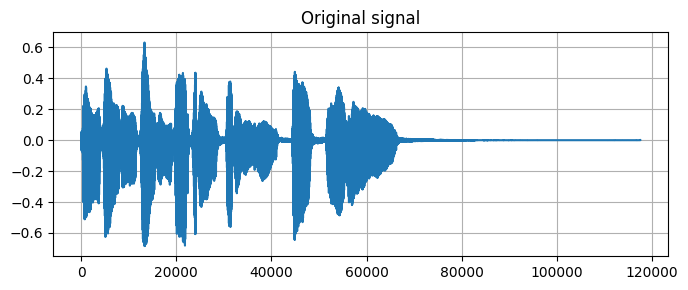

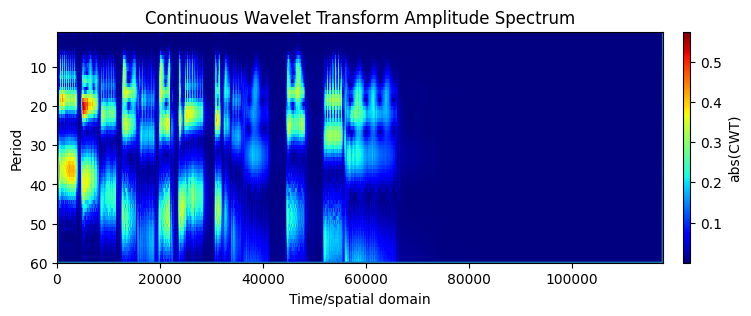

In [9]:
%matplotlib inline
import scaleogram as scg

# Range of scales to perform the transform
scales = scg.periods2scales(np.arange(1, 60))

# Plot the original signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 3))
lines = ax1.plot(audio) 
#ax1.set_xlim(0, sr)
ax1.grid()
ax1.set_title("Original signal")
fig1.tight_layout()

# Compute and plot the scaleogram
ax2 = scg.cws(audio, scales=scales, figsize=(8.5, 3))

Как видно из графика, вейвлет-преобразование позволяет получить информацию о том, какие частоты присутствуют в сигнале в каждый момент времени.

## Time-Frequency trade-off

Как и в случае с оконным преобразованием Фурье, справедлив принцип неопределенности, согласно которому мы можем получить хорошее разрешение либо по времени, либо по частоте. Однако у вейвлет-преобразований есть одна особенность. 

В отличе от оконного преобразования Фурье, у которого разрешение по времени и частоте остается постоянным (при неменяющемся размере окна), у вейвлет-преобразований **разрешение зависит от шкалы (то есть частоты) вейвлета**.

Ниже приведены графики **uncertainty boxes** для сигнала во временной области и трех видов преобразований: Фурье, оконного преобразования Фурье и вейвлет-преобразования. Грани прямоугольников показывают, каким количеством информации об одной характеристике мы жертвуем, чтобы получить информацию о другой характеристике. Видно ключевое отличие вейвлет-преобразования: разрешение не является фиксированным и зависит от частоты.

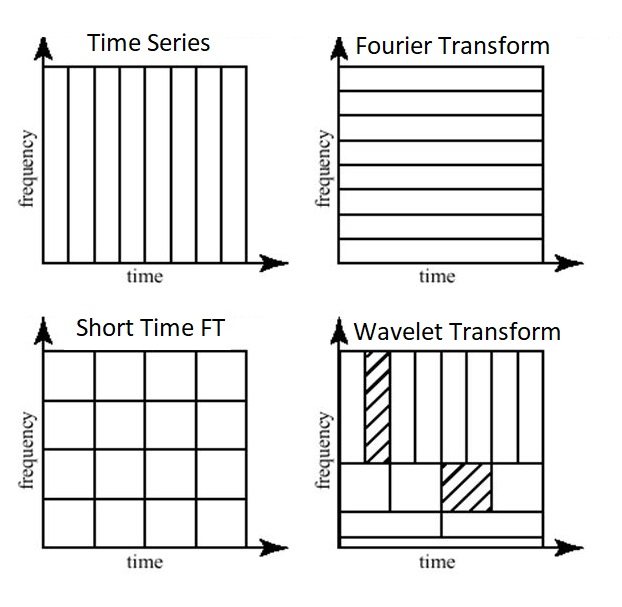

In [10]:
from IPython.display import Image

Image(filename='../img/Comparisonoftransformations.jpeg')

Во временной области у нас есть вся информация о времени, однако полностью отсутствует информация о частоте; в частнотной области - наоборот.

В оконном преобразовании Фурье разрешение по времени и по частоте остается постоянным, а в случае с вейвлет-преобразованием разрешение меняется: на низких частотах у нас высокое разрешение по частоте, и низкое по времени, на высоких частотах - наоборот. 

Это логично, так как низкие частоты длятся продолжительное количество времени, поэтому точное разрешение по времени не так важно, а вот небольшой сдвиг по частоте (2 Гц вместо 1) может значительно изменить ситуацию. И наборот, высокие частоты локализованы на маленьком отрезке времени, поэтому нам важно высокое разрешение по времени, а конкретное значение частоты (500 или 501 Гц) становится менее принципально.

## Вейвлет-преобразования для изображений

Так как изображения являются 2D-данными, мы можем отдельно посчитать одномерное вейвлет-преобразование для строк и для столбцов. 
Вейвлет-преобразования позволяют разделить информацию, представленную на картинке, на две части: аппроксимации и детали (подсигналы).

Сигнал проходит через 2 фильтра: фильтр верхних частот и нижних частот. Полученные компоненты высокой частоты это детали, а низкой - аппроксимации.

Сначала фильтры высоких и низких частот применяются к изображению построчно, выходные сигналы из этих фильтров даунсемплятся. Затем к полученным сигналам по столбцам применяются фильтры верхних и. нижних частот и снова производится даунсемплинг.

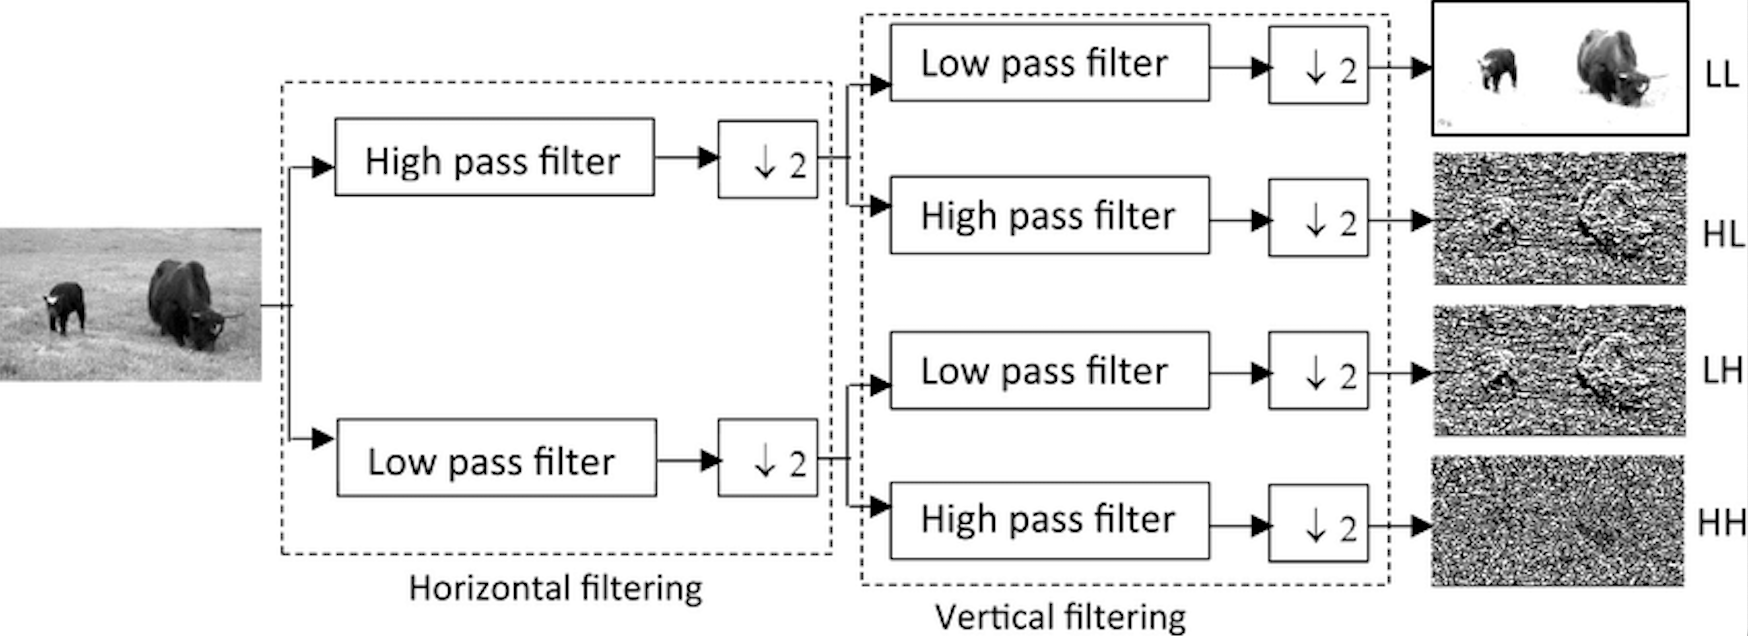

In [11]:
Image(filename='../img/DWT-decomposition.png')

*Источник: [Parida et al. , 2017. Wavelet based transition region extraction for image segmentation. Future Computing and Informatics Journal](https://www.researchgate.net/publication/321305814_Wavelet_based_transition_region_extraction_for_image_segmentation)*

Тогда мы получим 4 набора коэффициентов: аппроксимация, горизонтальные детали изображения, вертикальные детали изображения и диагональные детали изображения.

Рассмотрим преобразование изображений на примере.

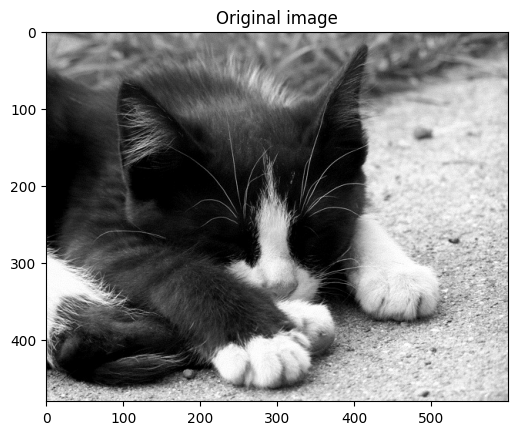

In [20]:
import cv2

image = cv2.imread('../img/kitten.jpeg')
plt.imshow(image)
plt.title('Original image')
plt.show()

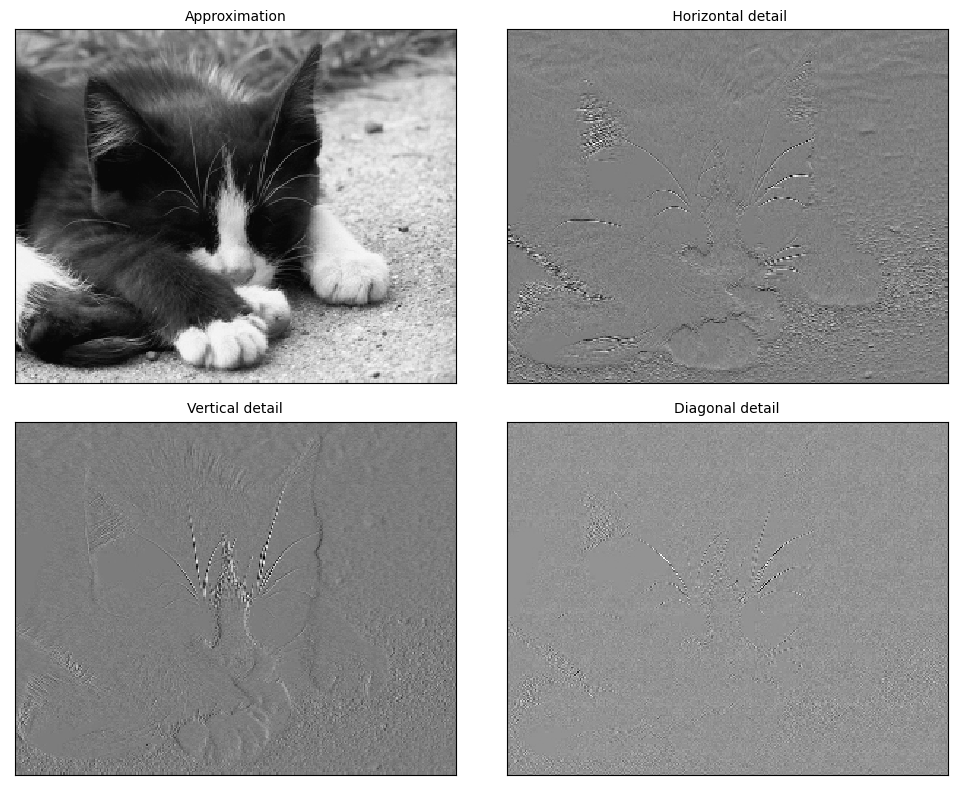

In [16]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(image[:, :, 0], 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(10, 8))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

Можно делать несколько последовательных вейвлет-преобразований подряд. Тогда на каждом уровне последующем уровне раскладываться будет только аппроксимация с предыдущего уровня. Рассмотрим на примере трехуровневое вейвлет-преобразование.

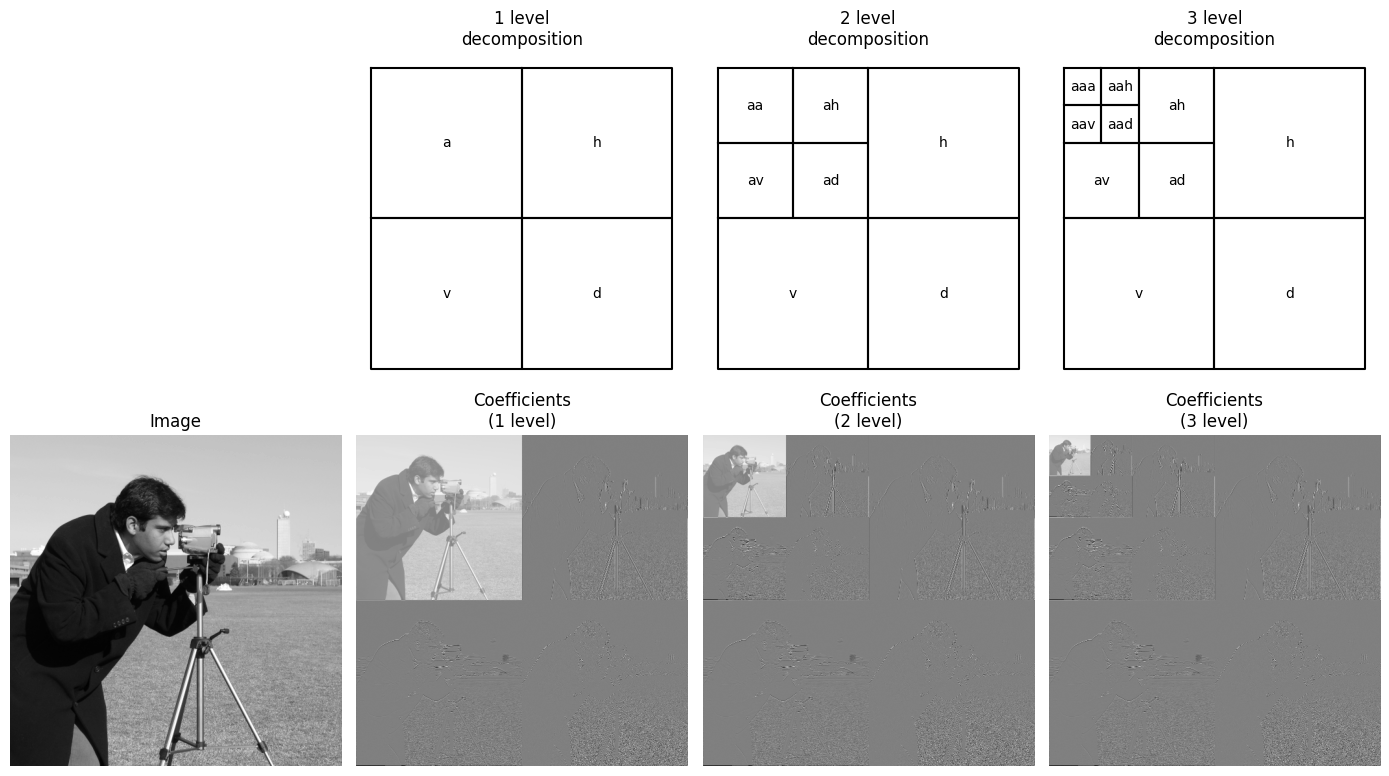

In [17]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

*Источник: [pyWavelets Documentation](https://pywavelets.readthedocs.io/en/latest/ref/2d-decompositions-overview.html)*

## Создание кастомных вейвлетов

Так как каждая функция, удовлетворяющая условиям (14.2), (14.3) является вейвлетом, можно создавать свои функции для вейвлет-преобразований.

В библиотеке pyWavelets для создания своей вейвлет-функции нужно создать объект класса `Wavelet`, определить для него название `name` и используемый банк фильтров `filter_bank`. Фильтры нужно задавать в следующем порядке:
- фильтр разложения нижних частот
- фильтр разложения высоких частот
- фильтр восстановления нижних частот
- фильтр восстановления нижних частот

In [18]:
# Construct custom wavelet
const = 10
c = np.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [-c*const, c], [c, c], [c, -c*const], [c, c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
custom_wavelet = pywt.Wavelet(name="custom", filter_bank=filter_bank)

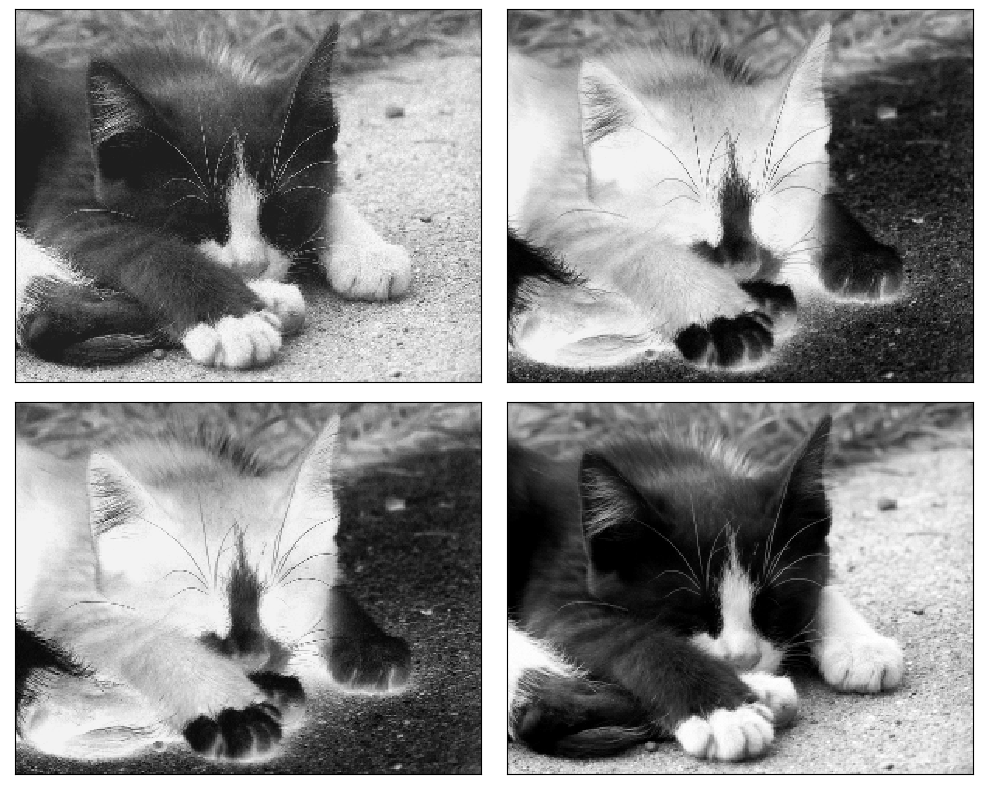

In [19]:
# Apply wavelet filters
coeffs = pywt.dwt2(image[:,:,0], custom_wavelet)
cA, (cH, cV, cD) = coeffs

# Plot result
fig = plt.figure(figsize=(10, 8))
for i, a in enumerate([cA, cH, cV, cD]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()